#📌 Extracción y Transformación

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

df = pd.read_json("TelecomX_Data.json")
df.sample()

,customerID,Churn,customer,phone,internet,account
1281,1842-EZJMK,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [ ]:
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)
customer_df


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [ ]:
phone_df

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [ ]:
internet_df

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [ ]:
account_df

,Contract,PaperlessBilling,PaymentMethod,Charges
0,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"
...,...,...,...,...
7262,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}"
7263,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}"
7264,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}"
7265,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}"


In [ ]:
charges_df = account_df['Charges'].apply(pd.Series)
charges_df

,Monthly,Total
0,65.60,593.3
1,59.90,542.4
2,73.90,280.85
3,98.00,1237.85
4,83.90,267.4
...,...,...
7262,55.15,742.9
7263,85.10,1873.7
7264,50.30,92.75
7265,67.85,4627.65


In [ ]:
df = pd.concat([df, customer_df, phone_df, internet_df, charges_df,account_df], axis=1)
df.drop(['customer', 'phone', 'internet', 'account','Charges'], axis=1, inplace=True)


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Monthly,Total,Contract,PaperlessBilling,PaymentMethod
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,65.6,593.3,One year,Yes,Mailed check
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,59.9,542.4,Month-to-month,No,Mailed check
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,73.9,280.85,Month-to-month,Yes,Electronic check
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,98.0,1237.85,Month-to-month,Yes,Electronic check
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,83.9,267.4,Month-to-month,Yes,Mailed check


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Monthly           7267 non-null   float64


In [ ]:
df = df.replace(' ', np.nan)
df = df.replace('', np.nan)

In [ ]:
df["Churn"].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
numero_de_duplicados = df['customerID'].duplicated().sum()
numero_de_duplicados

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Monthly           7267 non-null   float64


In [ ]:
df = df.dropna(axis=0)

In [ ]:
numeric = df[["SeniorCitizen","tenure","Monthly","Total"]]
numeric["Total"] = numeric["Total"].astype(float)
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SeniorCitizen  7032 non-null   int64  
 1   tenure         7032 non-null   int64  
 2   Monthly        7032 non-null   float64
 3   Total          7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 274.7 KB


<ipython-input-62-461794479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric["Total"] = numeric["Total"].astype(float)


In [ ]:
variable = df["Churn"]

In [ ]:
variable

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [ ]:
categorica = df.drop(["SeniorCitizen","tenure","Monthly","Total","Churn","customerID"], axis=1)

In [ ]:
categorica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   Partner           7032 non-null   object
 2   Dependents        7032 non-null   object
 3   PhoneService      7032 non-null   object
 4   MultipleLines     7032 non-null   object
 5   InternetService   7032 non-null   object
 6   OnlineSecurity    7032 non-null   object
 7   OnlineBackup      7032 non-null   object
 8   DeviceProtection  7032 non-null   object
 9   TechSupport       7032 non-null   object
 10  StreamingTV       7032 non-null   object
 11  StreamingMovies   7032 non-null   object
 12  Contract          7032 non-null   object
 13  PaperlessBilling  7032 non-null   object
 14  PaymentMethod     7032 non-null   object
dtypes: object(15)
memory usage: 879.0+ KB


#📊  Análisis

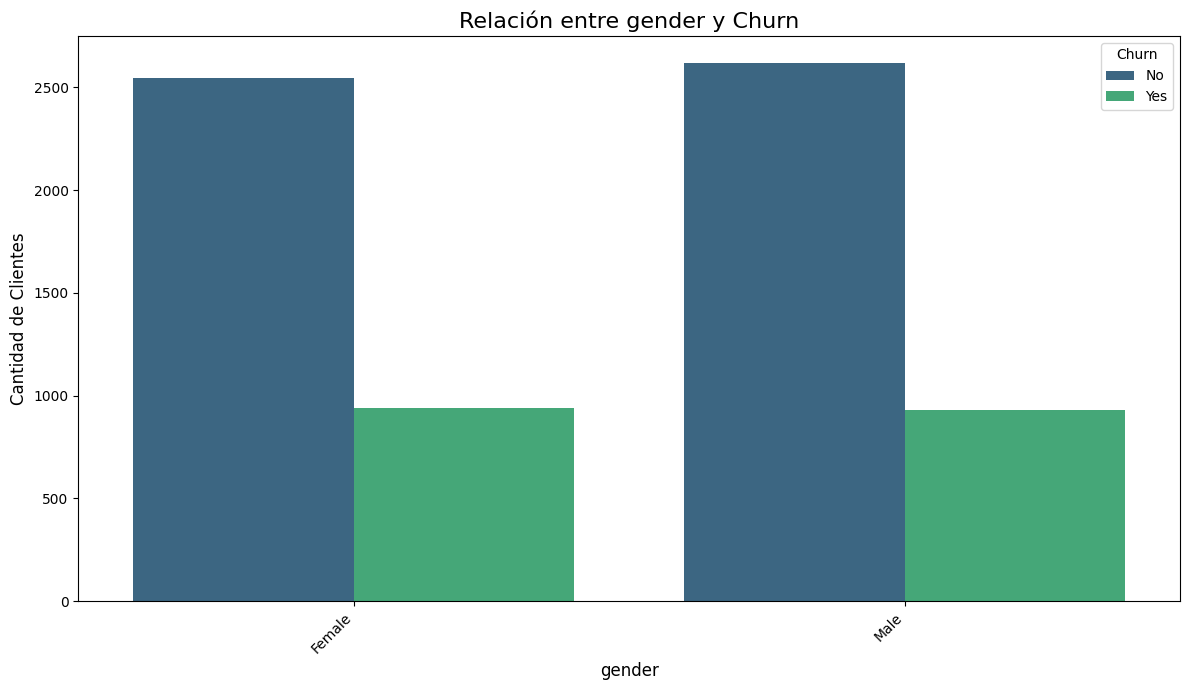

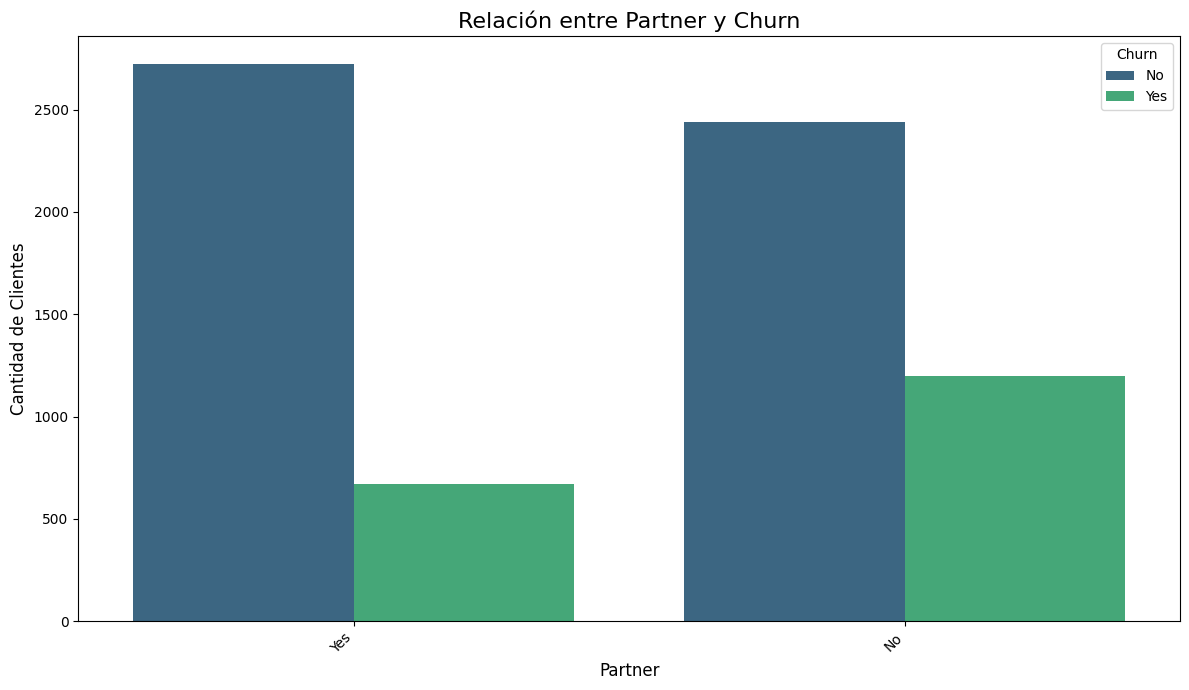

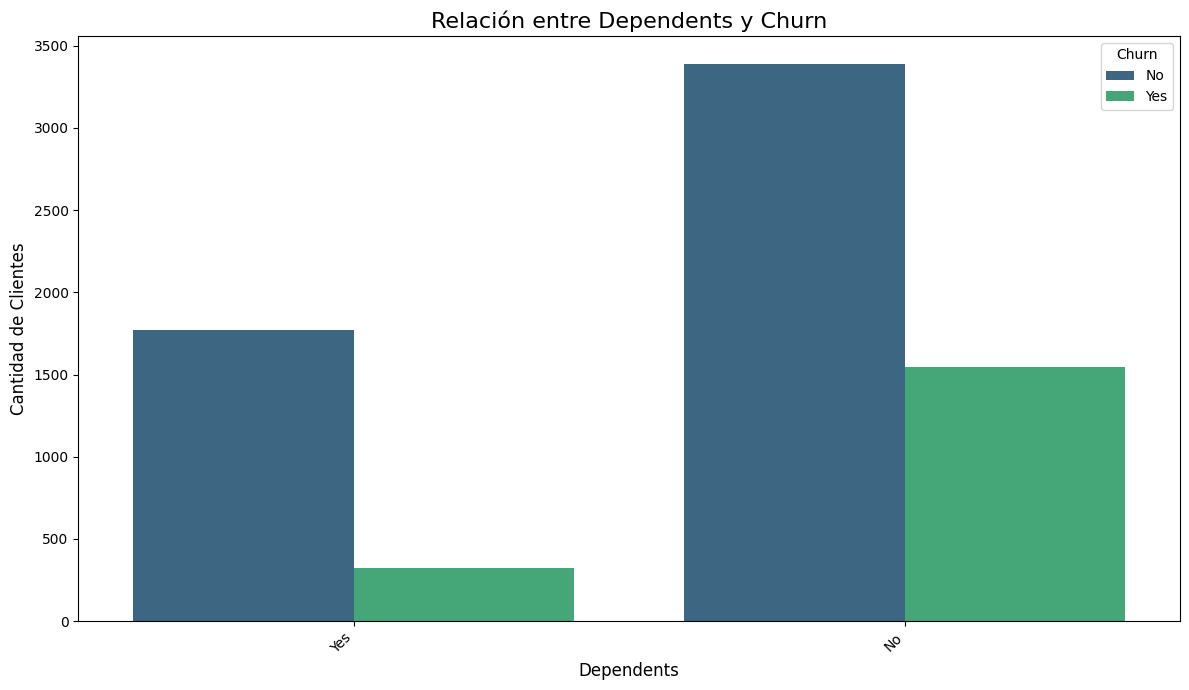

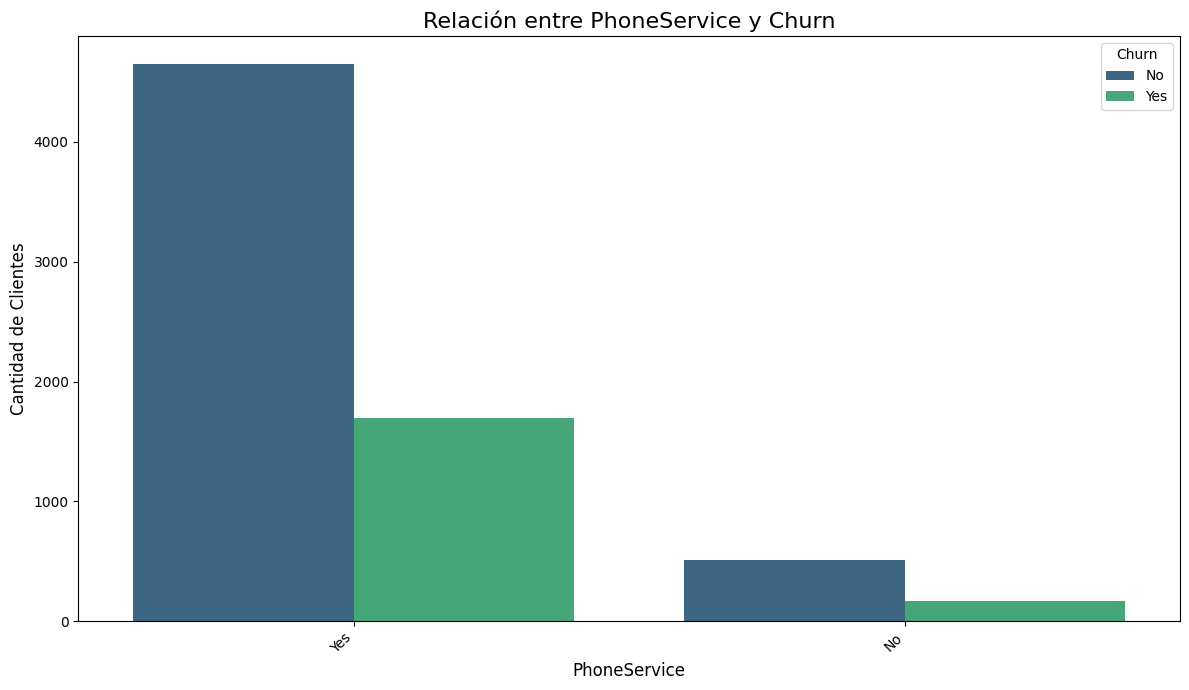

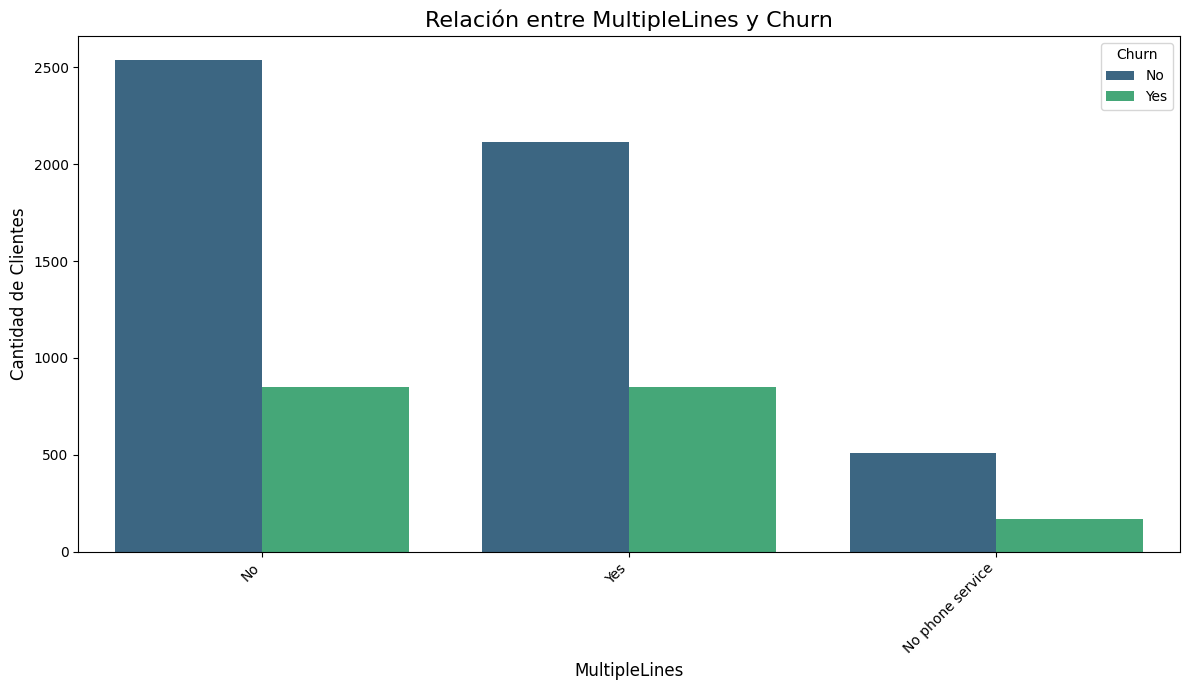

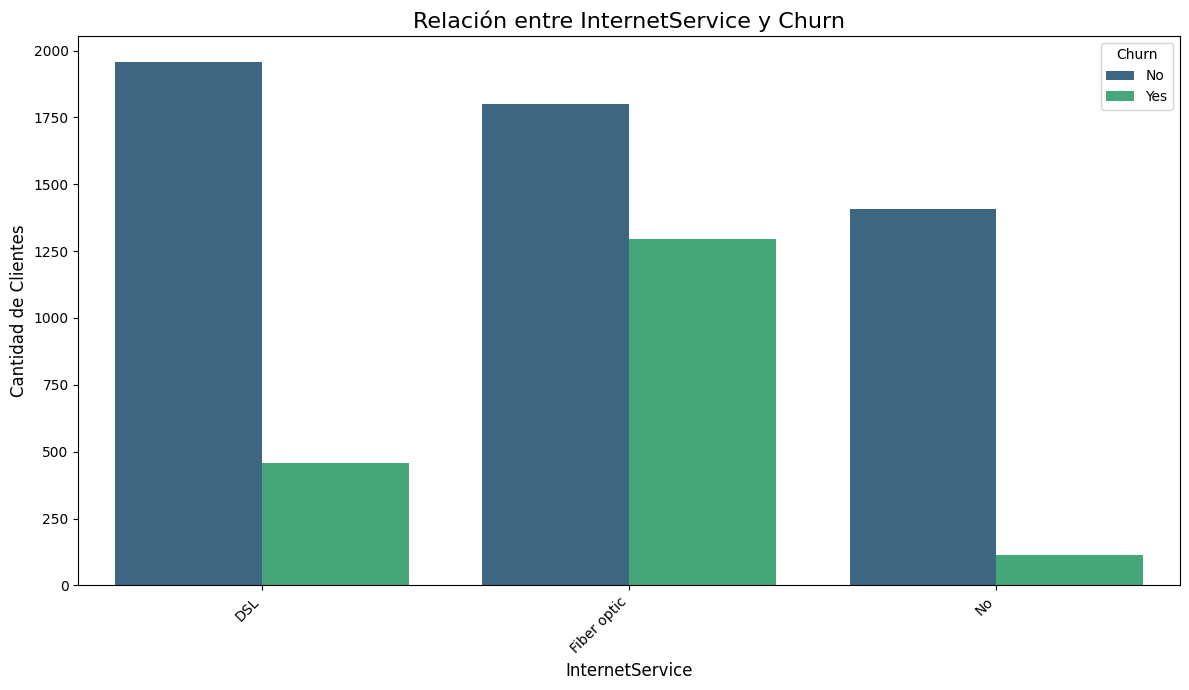

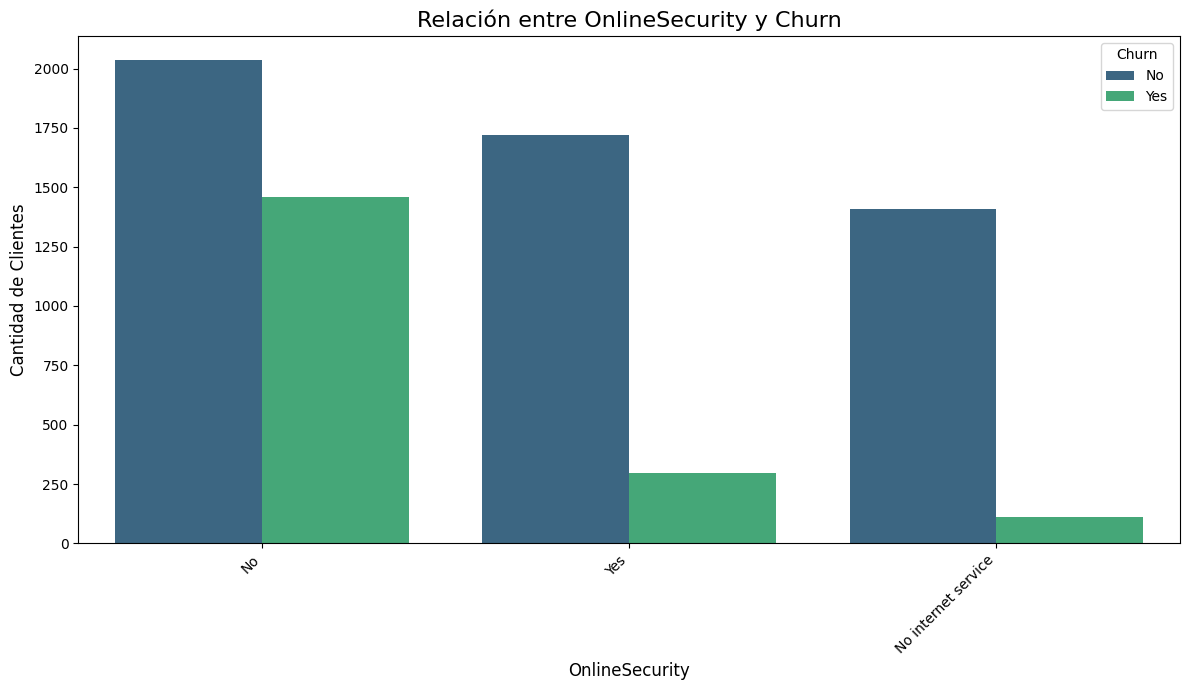

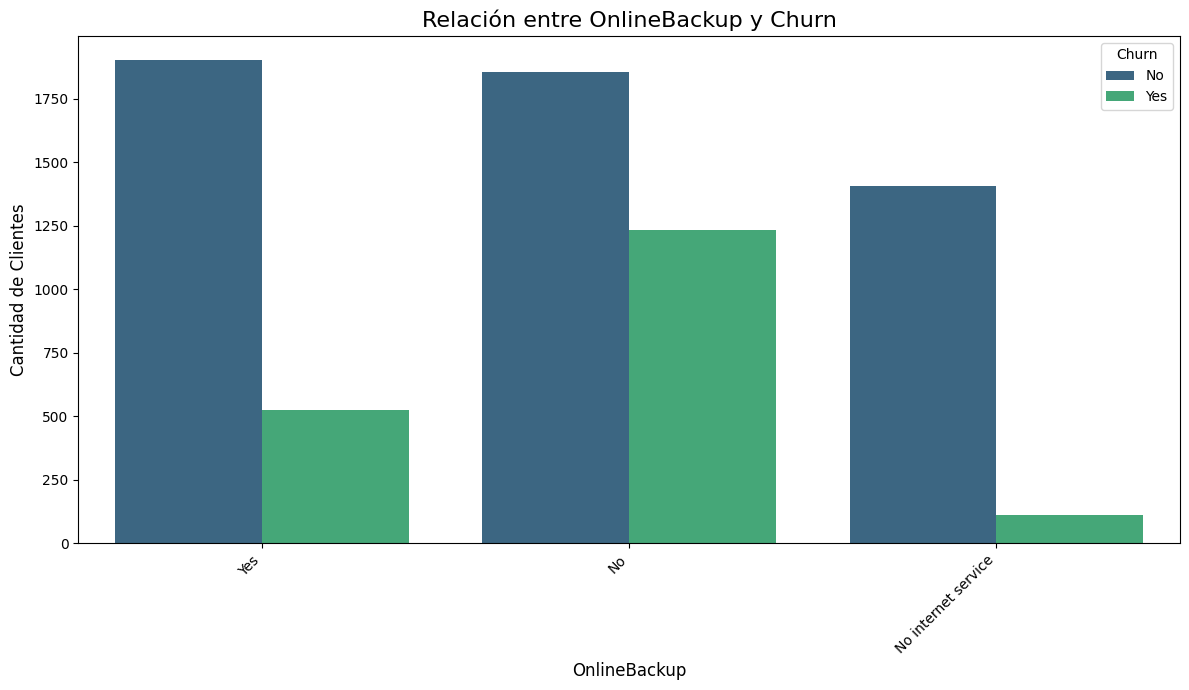

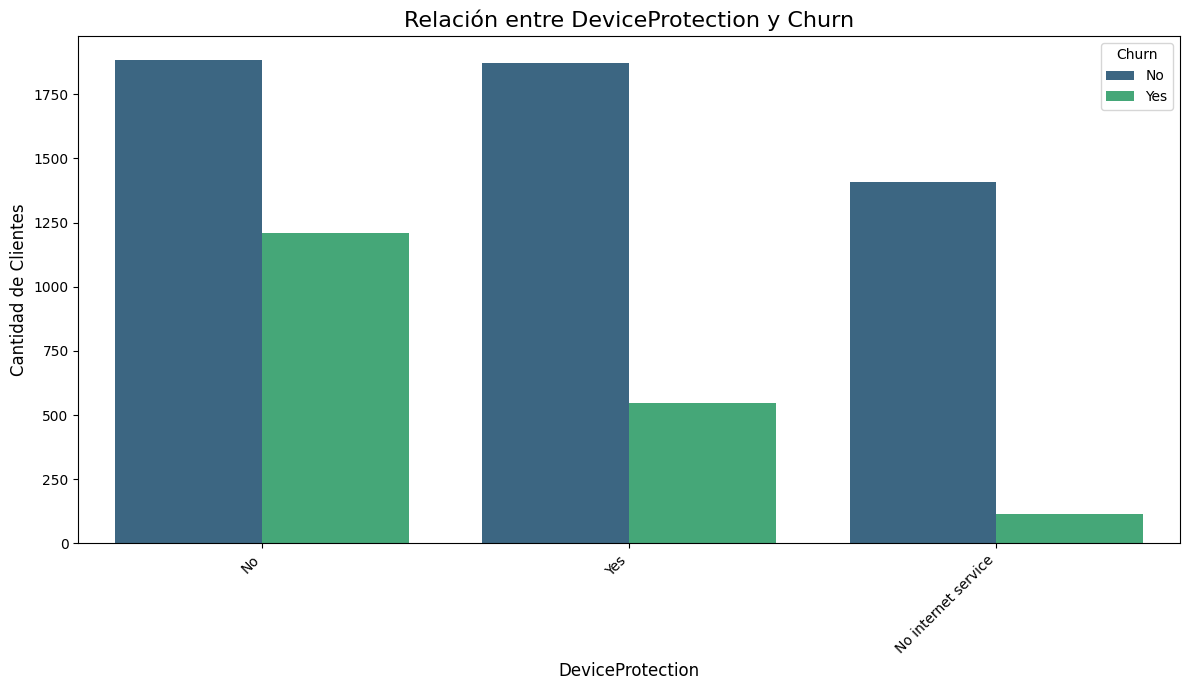

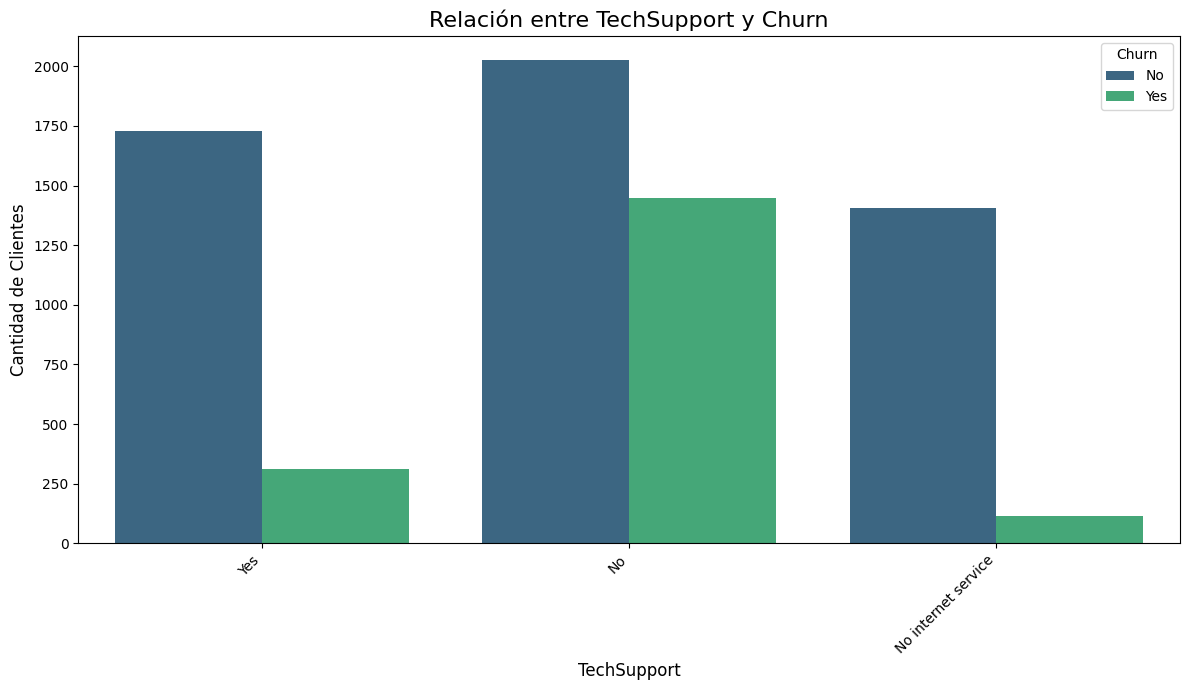

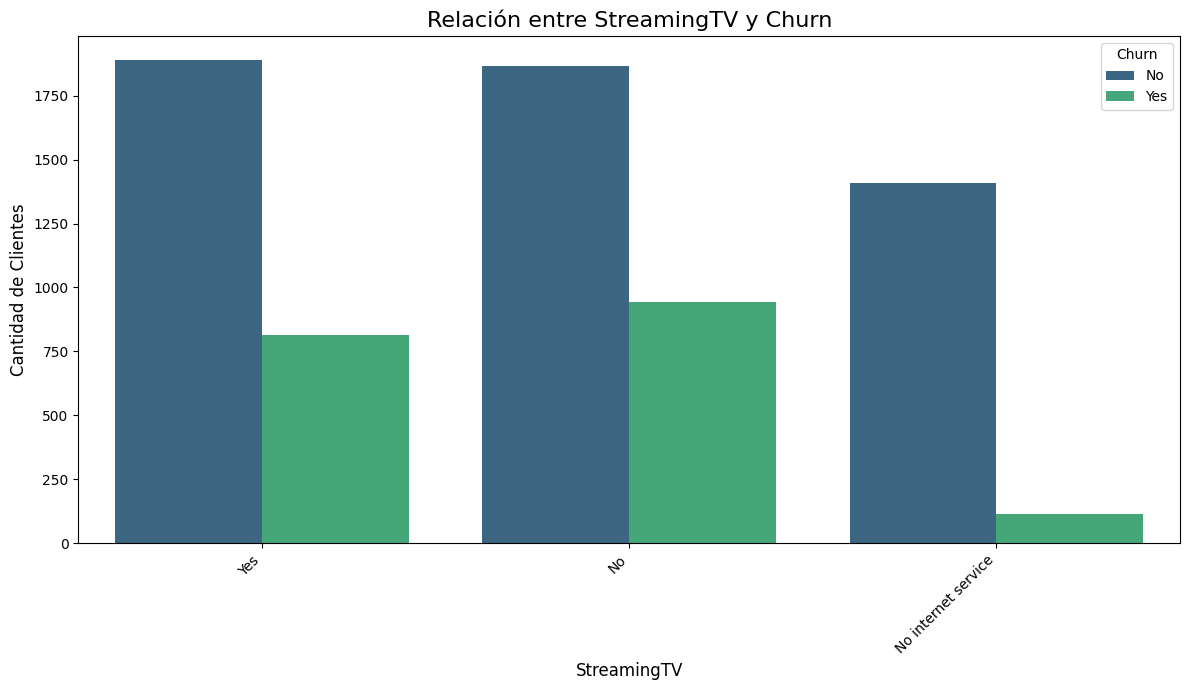

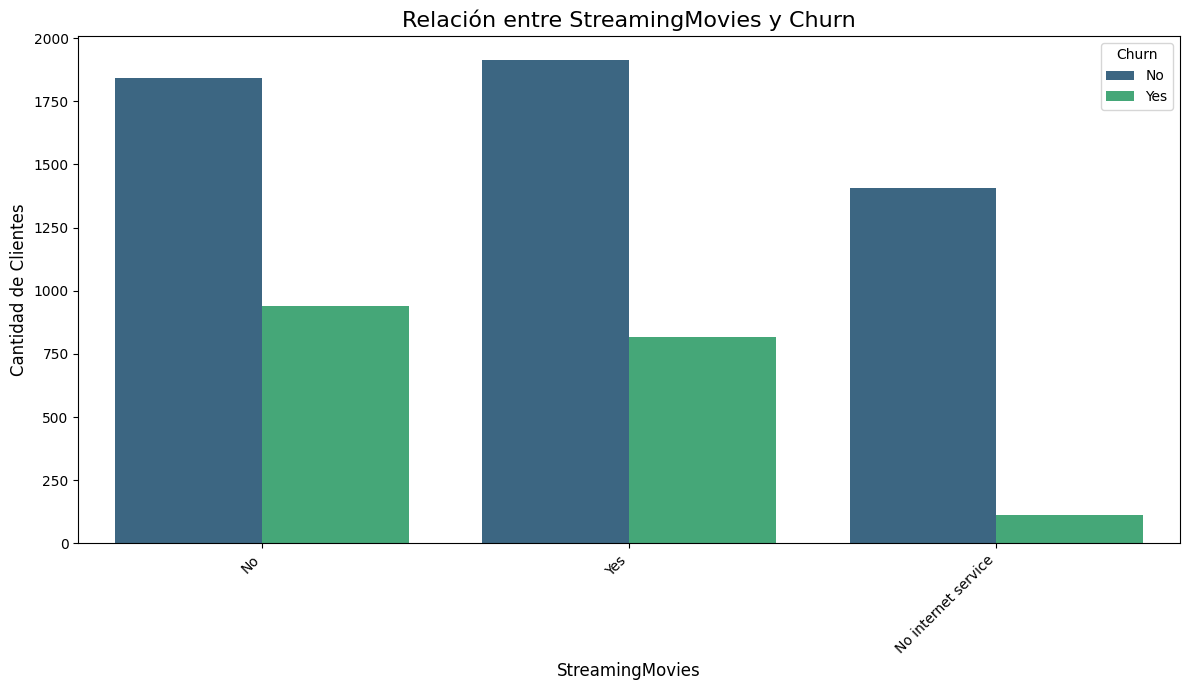

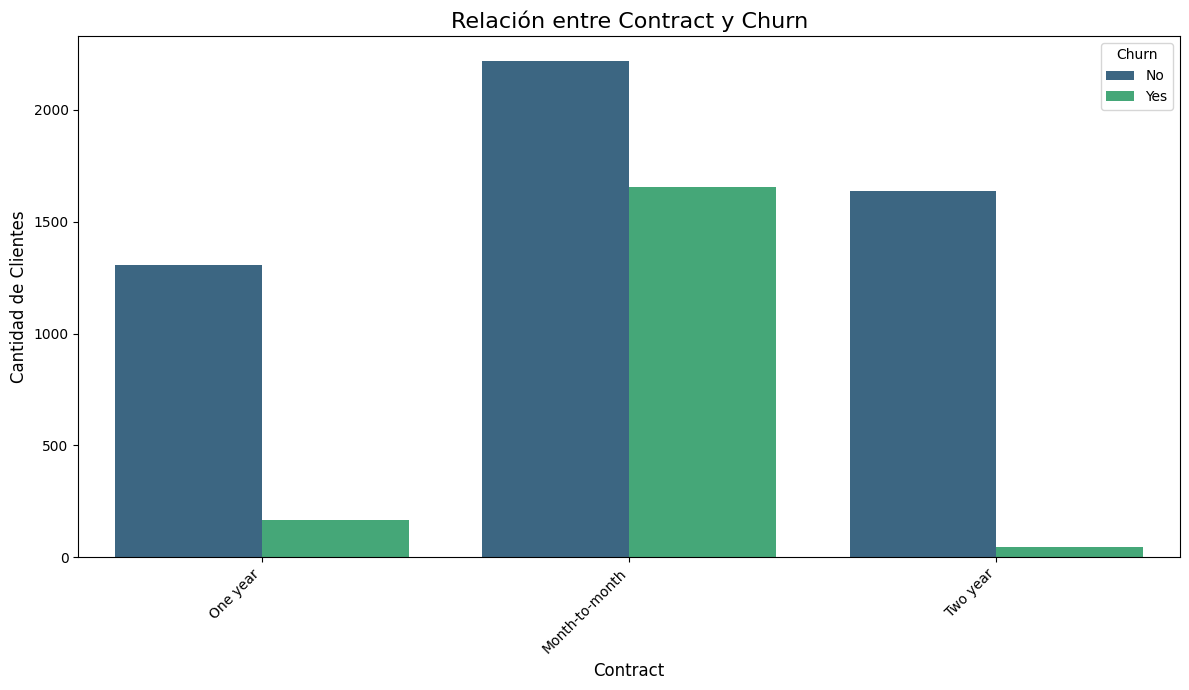

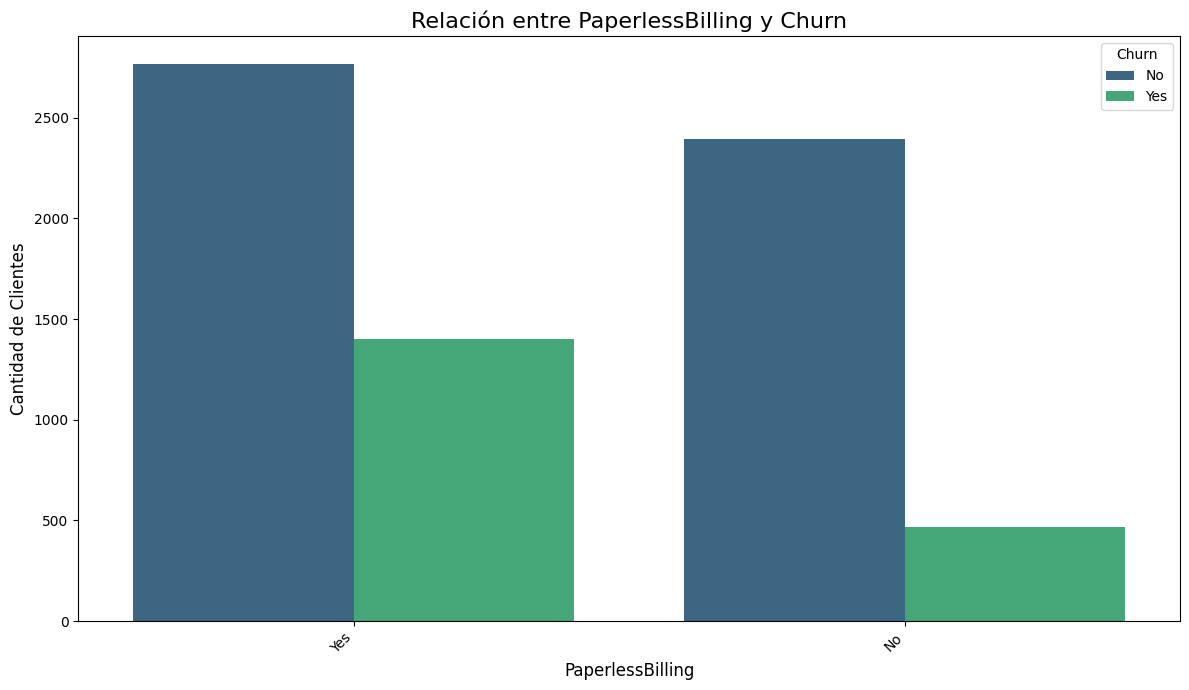

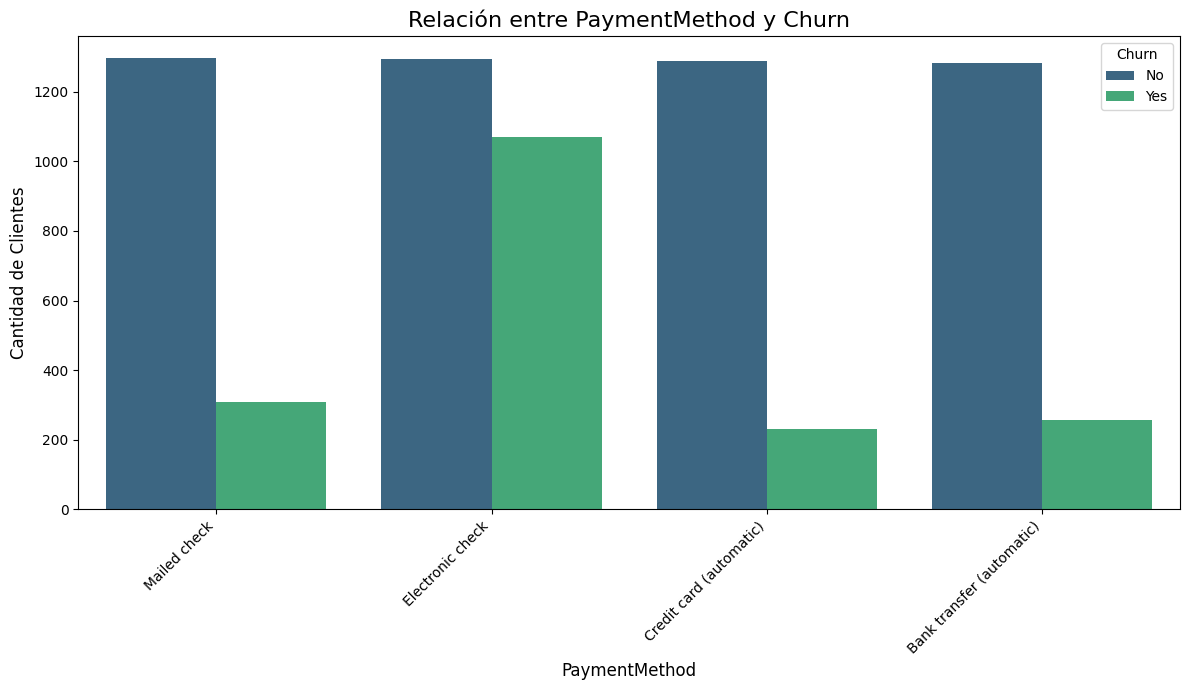

In [ ]:
for col in categorica.columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=col, hue='Churn', data=pd.concat([categorica, variable], axis=1), palette="viridis")
    plt.title(f'Relación entre {col} y Churn', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

In [ ]:
columnas_id = df["customerID"]

In [ ]:
numeric['Churn'] = variable.apply(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-69-2626081955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['Churn'] = variable.apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
numeric

,SeniorCitizen,tenure,Monthly,Total,Churn
0,0,9,65.60,593.30,0
1,0,9,59.90,542.40,0
2,0,4,73.90,280.85,1
3,1,13,98.00,1237.85,1
4,1,3,83.90,267.40,1
...,...,...,...,...,...
7262,0,13,55.15,742.90,0
7263,0,22,85.10,1873.70,1
7264,0,2,50.30,92.75,0
7265,0,67,67.85,4627.65,0


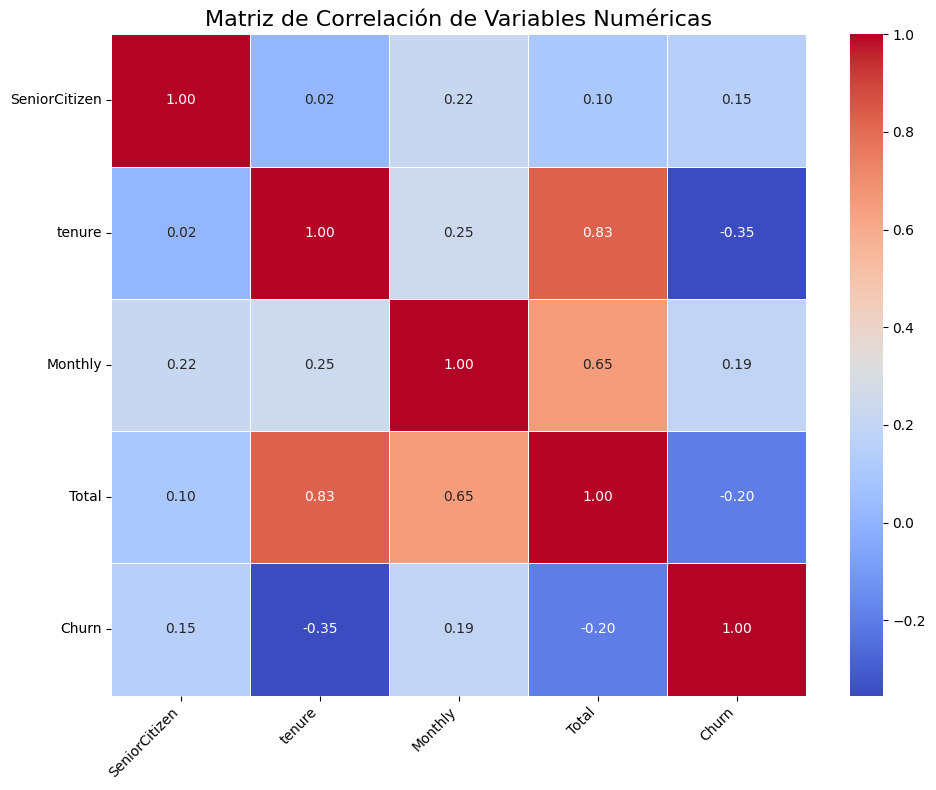

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
variable = numeric['Churn']
variable

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [ ]:
tabla_1 = pd.crosstab(categorica['gender'], variable)
chi2_stat, p_value, dof, expected_freq = chi2_contingency(tabla_1)
print(f"\nEl p-value para la variable 'gender' es: {p_value}")


El p-value para la variable 'gender' es: 0.4904884707065509


In [ ]:
# Nivel de significancia
alpha = 0.05

# 1. El bucle 'for' itera sobre cada nombre de columna en tu DataFrame 'categorica'.
for col in categorica.columns:

    # 2. Se crea la tabla de contingencia usando la columna actual ('col').
    tabla_contingencia = pd.crosstab(categorica[col], variable)

    # 3. Se aplica la prueba a esa tabla específica.
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(tabla_contingencia)

    # 4. Se imprimen e interpretan los resultados para la columna actual.
    print(f"\n===== Variable: '{col}' =====")
    print(f"P-value calculado: {p_value:.4g}") # Usamos .4g para formato científico si el número es muy pequeño

    if p_value < alpha:
        print(f"✅ Resultado: SIGNIFICATIVO. Es muy probable que '{col}' influya en el Churn.")
    else:
        print(f"❌ Resultado: NO SIGNIFICATIVO. No hay evidencia de que '{col}' influya en el Churn.")
    print("-" * 70)


===== Variable: 'gender' =====
P-value calculado: 0.4905
❌ Resultado: NO SIGNIFICATIVO. No hay evidencia de que 'gender' influya en el Churn.
----------------------------------------------------------------------

===== Variable: 'Partner' =====
P-value calculado: 3.974e-36
✅ Resultado: SIGNIFICATIVO. Es muy probable que 'Partner' influya en el Churn.
----------------------------------------------------------------------

===== Variable: 'Dependents' =====
P-value calculado: 2.02e-42
✅ Resultado: SIGNIFICATIVO. Es muy probable que 'Dependents' influya en el Churn.
----------------------------------------------------------------------

===== Variable: 'PhoneService' =====
P-value calculado: 0.3499
❌ Resultado: NO SIGNIFICATIVO. No hay evidencia de que 'PhoneService' influya en el Churn.
----------------------------------------------------------------------

===== Variable: 'MultipleLines' =====
P-value calculado: 0.003568
✅ Resultado: SIGNIFICATIVO. Es muy probable que 'MultipleLines' 

In [ ]:
numeric['Cuentas_Diarias'] = numeric['Monthly'] / 30
numeric

<ipython-input-76-1891906739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['Cuentas_Diarias'] = numeric['Monthly'] / 30


,SeniorCitizen,tenure,Monthly,Total,Churn,Cuentas_Diarias
0,0,9,65.60,593.30,0,2.186667
1,0,9,59.90,542.40,0,1.996667
2,0,4,73.90,280.85,1,2.463333
3,1,13,98.00,1237.85,1,3.266667
4,1,3,83.90,267.40,1,2.796667
...,...,...,...,...,...,...
7262,0,13,55.15,742.90,0,1.838333
7263,0,22,85.10,1873.70,1,2.836667
7264,0,2,50.30,92.75,0,1.676667
7265,0,67,67.85,4627.65,0,2.261667


In [ ]:
numeric.describe()

,SeniorCitizen,tenure,Monthly,Total,Churn,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,2.159940
std,0.368844,24.545260,30.085974,2266.771362,0.441782,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,0.000000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,2.995417
max,1.000000,72.000000,118.750000,8684.800000,1.000000,3.958333


In [ ]:
categorica.describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


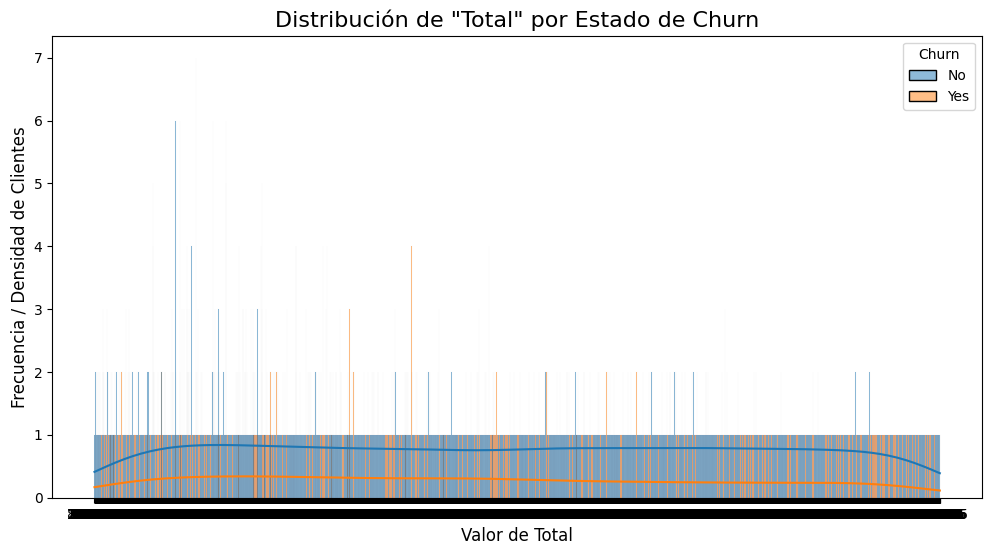

<ipython-input-87-454441848>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette=['skyblue', 'salmon'])


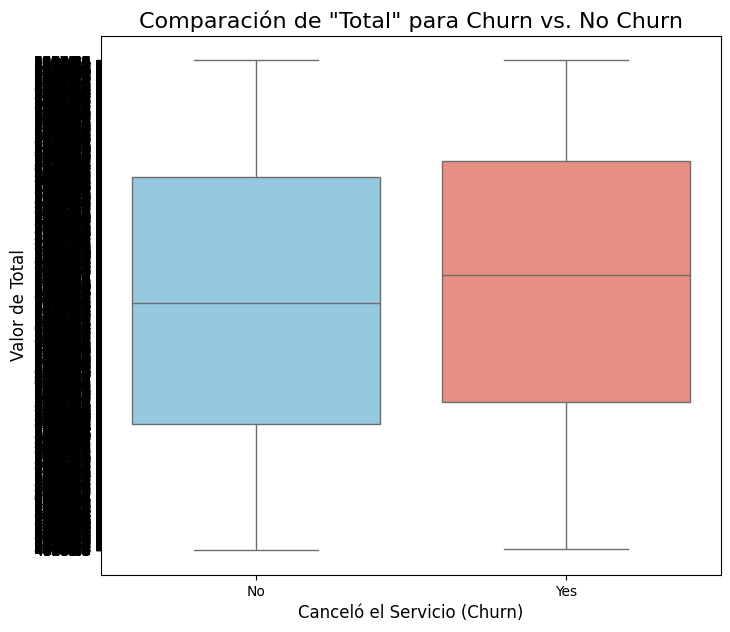

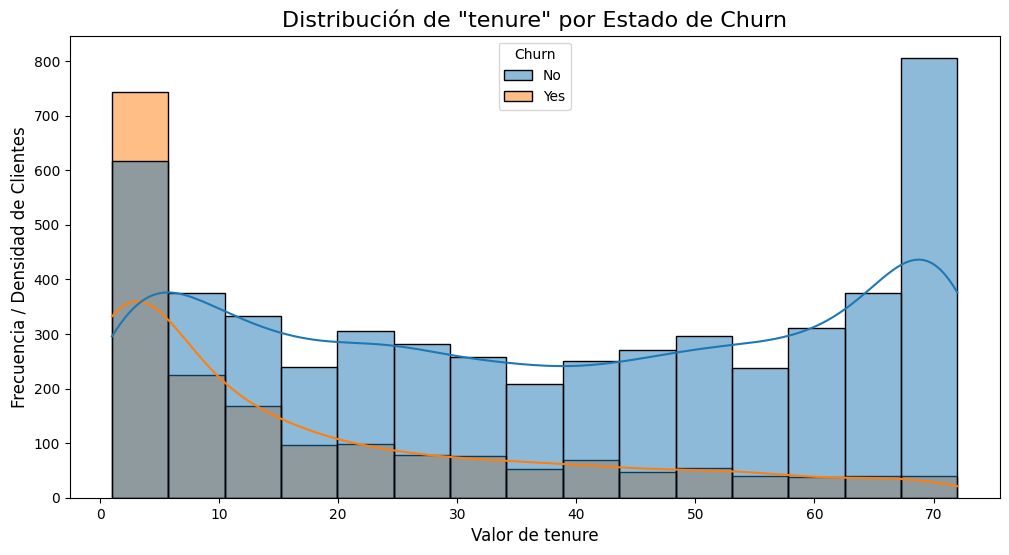

<ipython-input-87-454441848>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette=['skyblue', 'salmon'])


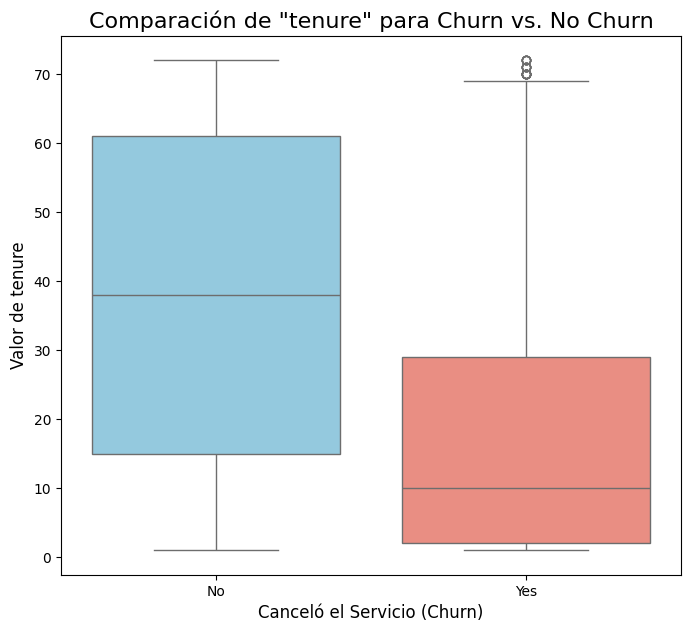

In [ ]:
columna_analizar =["Total","tenure"]
for var in columna_analizar:

    # --- Gráfico de Densidad / Histograma ---
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=var, hue='Churn', multiple='layer', kde=True, common_norm=False)
    plt.title(f'Distribución de "{var}" por Estado de Churn', fontsize=16)
    plt.xlabel(f'Valor de {var}', fontsize=12)
    plt.ylabel('Frecuencia / Densidad de Clientes', fontsize=12)
    plt.show()

    # --- Diagrama de Caja (Box Plot) ---
    plt.figure(figsize=(8, 7))
    sns.boxplot(data=df, x='Churn', y=var, palette=['skyblue', 'salmon'])
    plt.title(f'Comparación de "{var}" para Churn vs. No Churn', fontsize=16)
    plt.xlabel('Canceló el Servicio (Churn)', fontsize=12)
    plt.ylabel(f'Valor de {var}', fontsize=12)
    plt.show()

#📄Informe final


Informe de Análisis sobre Evasión de Clientes (Churn)
Introducción

El presente informe detalla el análisis realizado sobre el conjunto de datos de TelecomX LATAM con el objetivo de identificar las causas principales de la evasión de clientes, fenómeno conocido como Churn. Comprender qué factores llevan a un cliente a cancelar su servicio es fundamental para desarrollar estrategias que permitan retenerlos y asegurar la estabilidad del negocio.

Procesamiento y Análisis de los Datos

Para poder realizar un análisis fiable, los datos iniciales, provenientes de un archivo JSON anidado, requirieron una preparación significativa. El proceso incluyó la restructuración y aplanamiento de la base de datos, la limpieza de valores nulos o inconsistentes y la conversión de columnas a los tipos de datos correctos (numéricos y categóricos).

Una vez con los datos limpios, se procedió a la fase exploratoria. Se examinó cada variable categórica para ver su impacto en la tasa de Churn, validando los hallazgos con la prueba estadística de Chi-cuadrado para confirmar su significancia. Para las variables numéricas, como la antigüedad del cliente (tenure) y los cargos mensuales, se utilizaron visualizaciones (histogramas y diagramas de caja) para comparar directamente el comportamiento de los clientes que se quedaron versus los que se fueron.

Hallazgos Principales

El análisis reveló patrones muy claros y consistentes que definen un perfil de cliente con alto riesgo de evasión:

El tipo de contrato es el factor más determinante. Los clientes con contratos mes a mes muestran una tasa de cancelación drásticamente superior a los que tienen contratos de uno o dos años.
La antigüedad es crítica. La gran mayoría de las cancelaciones ocurren durante los primeros meses de servicio. Los clientes nuevos son, por tanto, el grupo más vulnerable.
Los servicios adicionales actúan como anclas. La falta de servicios de valor agregado, especialmente seguridad online y soporte técnico, está fuertemente correlacionada con una mayor probabilidad de Churn.
El método de pago importa. El pago mediante cheque electrónico se asocia con una tasa de Churn notablemente más alta en comparación con los pagos automáticos (tarjeta o transferencia).
Factores no influyentes. Se confirmó estadísticamente que variables como el género o el tener servicio telefónico no tienen una relación significativa con la evasión.
Conclusiones y Recomendaciones Estratégicas

Los datos sugieren que la evasión no es un evento aleatorio, sino que está ligada a condiciones contractuales y de servicio específicas. Basado en esto, se recomiendan las siguientes acciones estratégicas:

Fidelizar a través del Contrato: La conclusión más evidente es que los clientes con contratos a largo plazo son más leales.

Recomendación: Crear ofertas atractivas para que los clientes con planes mes a mes migren a contratos de 1 o 2 años. Además, implementar un programa de acompañamiento y beneficios para clientes nuevos durante sus primeros 90 días para superar el período de mayor riesgo.
Demostrar el Valor de los Servicios Adicionales: Los clientes que se sienten protegidos y respaldados tienden a quedarse más tiempo.

Recomendación: Ofrecer paquetes de bienvenida que incluyan seguridad online y soporte técnico de forma gratuita o con un gran descuento durante los primeros meses. Esto permite al cliente experimentar el valor del servicio, aumentando la probabilidad de que lo retenga a futuro.
Reducir la Fricción en la Experiencia: Aspectos como el método de pago o el tipo de servicio pueden generar puntos de fricción que lleven a la cancelación.

Recomendación: Incentivar el uso de métodos de pago automáticos con pequeños descuentos. A su vez, es crucial analizar la experiencia de los clientes con fibra óptica para entender por qué este segmento presenta un Churn más alto y así poder abordar los problemas de raíz.